# Music Recommendation System using Spotify API and Python

<font size="3"> Music recommendation systems work using complex algorithms to analyze large amounts of data about users' music interactions, such as listening history, songs liked, songs skipped, and even even the user's explicit preferences are transmitted through notes or comments. These data points play a vital role in building comprehensive user profiles that describe each individual's interests and preferences.


<font size="3"> In the initial phase, the system uses various data preprocessing techniques to clean and organize information effectively. The system then uses recommendation algorithms, such as collaborative filtering, content-based filtering, and hybrid methods, to create music recommendations.


<font size="3"> As users interact with the system, it accumulates additional data, refining and updating their profile in real time. As a result, recommendations are becoming more accurate and tailored to users' evolving music preferences.

## Spotify API

<font size ='3'> The Spotify API is a set of rules and protocols provided by Spotify developers. It allows developers to interact with Spotify's vast music catalog and collect music-related data. Through the Spotify API, developers can access information such as tracks, albums, artists, playlists, user profiles, and playback history among other features, allowing them to create applications and creative services that seamlessly integrate with the Spotify platform.

Below is the process you can follow to sign up for the Spotify developer account and get your credentials.

<b>Step 1: Create a Spotify Account</b>

For a Spotify developer account, you need an account at Spotify. https://developer.spotify.com/.  If you don’t use Spotify, create an account. 

You don’t need to purchase any subscription to get your credentials. 

Once you have created an account at Spotify (or you already have one) log in to your account from your web browser.

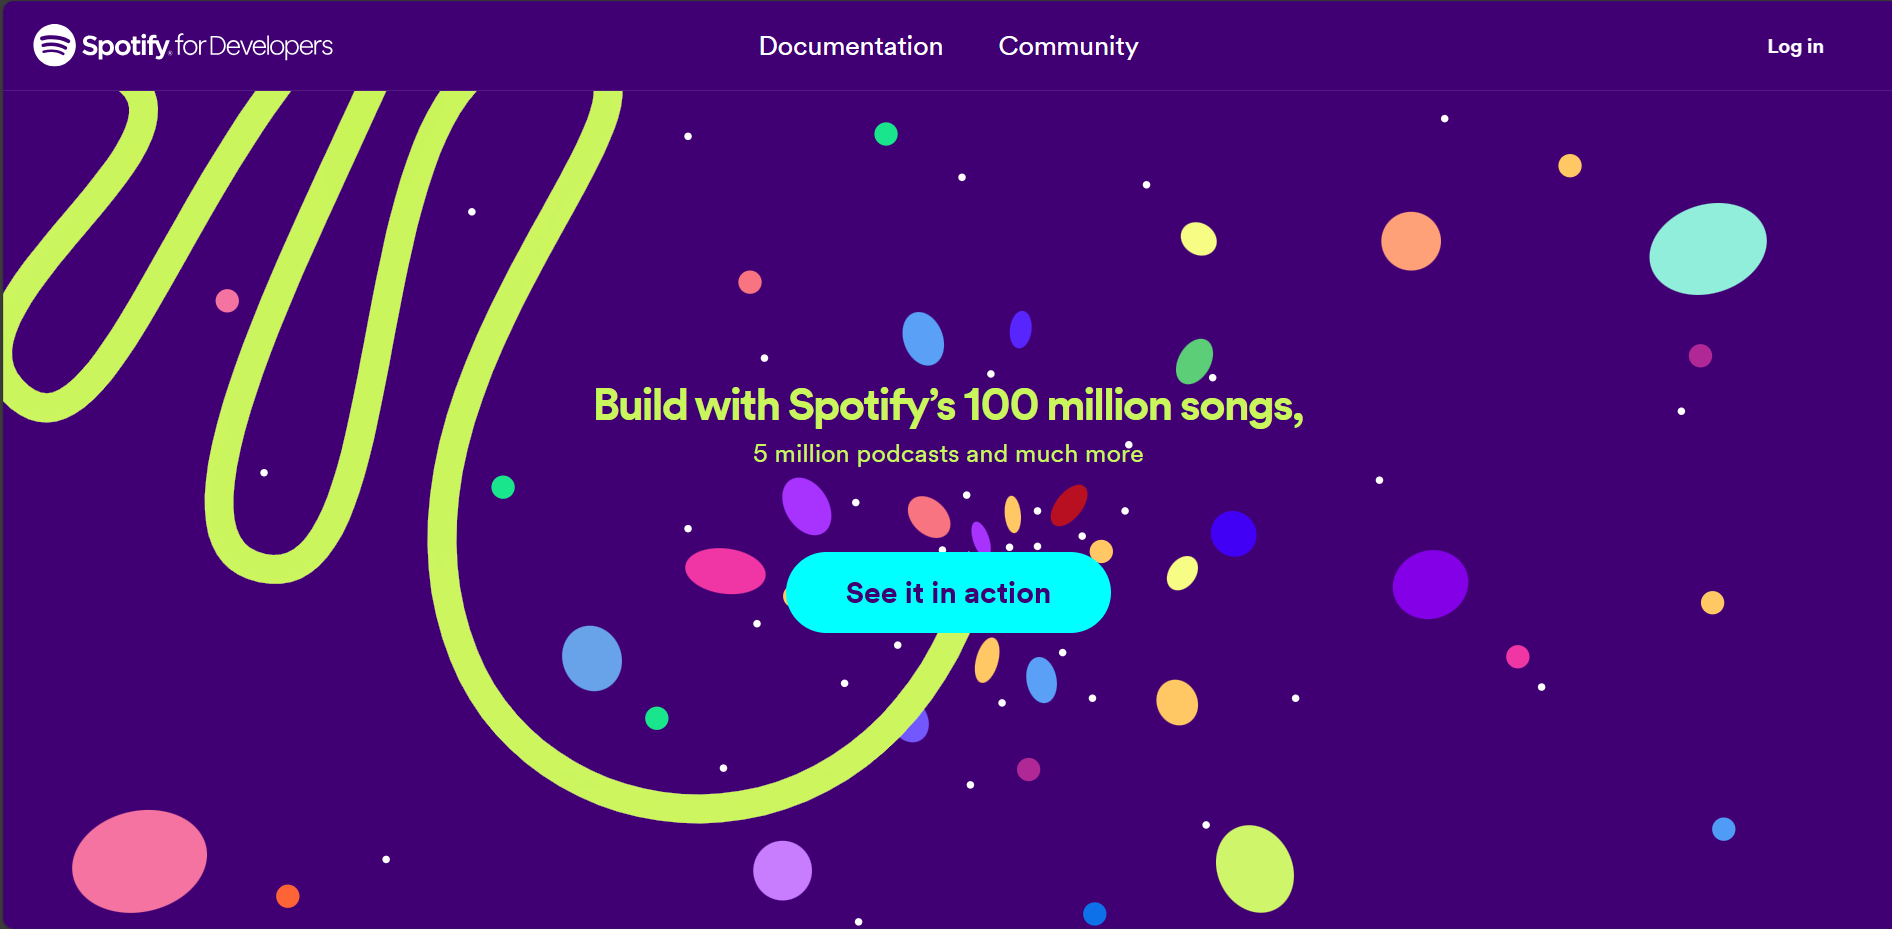

<b> Step 2: Go to Your Spotify Developer Dashboard </b>

Once you have created an account at Spotify, you need to log in to your Spotify developer dashboard. 

Here’s the link to the dashboard. As you will be using this developer account for the first time, sign the agreement and verify your email. 

After these steps, we can move to the next step.

<b> Step 3: Create An App </b>

Once you have verified an email, you will see an option to create an app in your dashboard, as shown in the image below.

Click “Create app” and move to the next step.

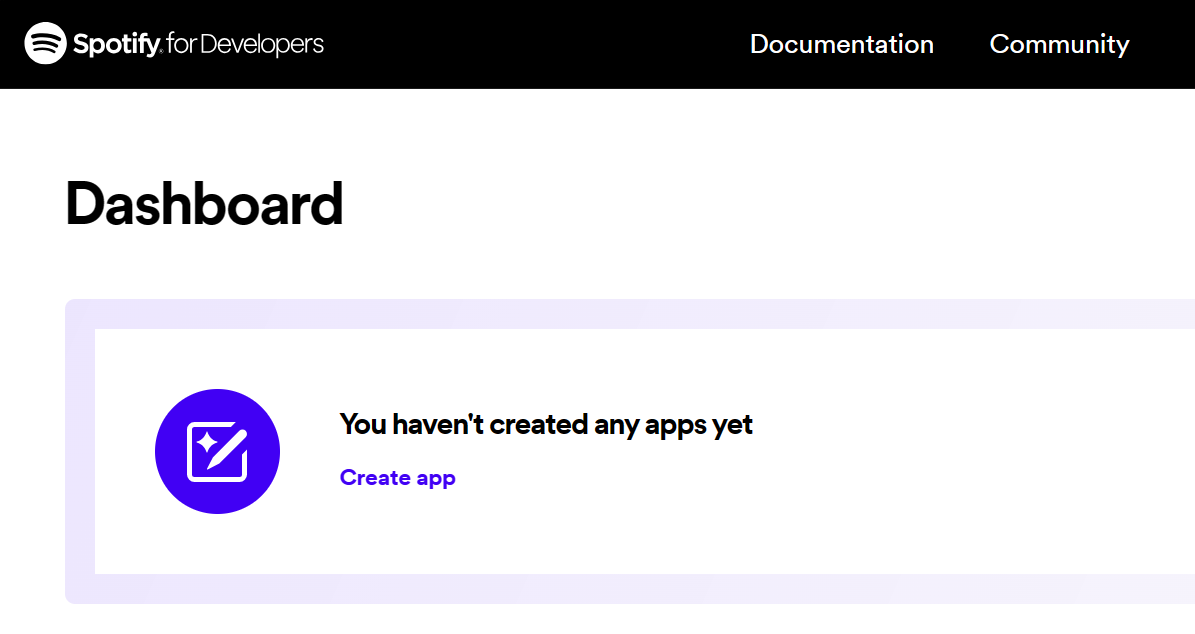

<b>Step 4: App Description </b>

Fill in the app description, as shown in the image below.

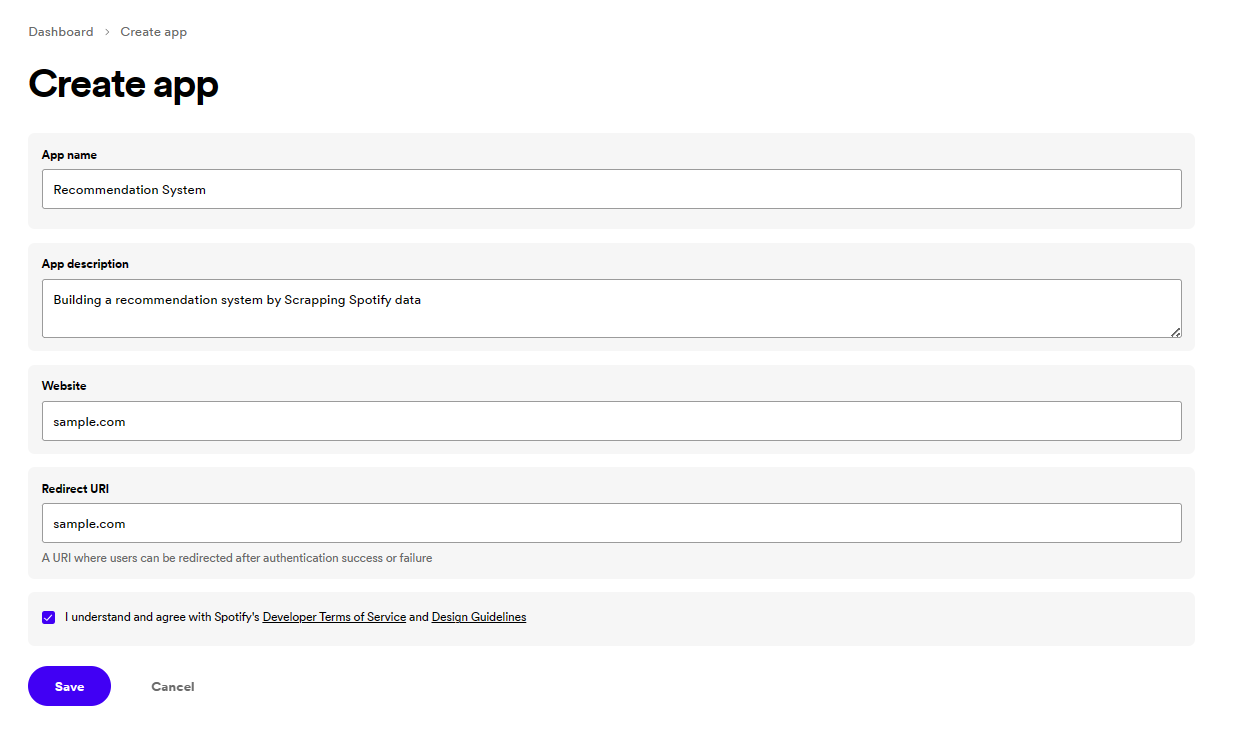

<b>Step 5: Copy Your Client ID and Client Secret</b>

After filling in the app description, you will be redirected to your id and password. If you click “View client secret”, you will see your password. Copy your credentials so that you can use them while building a Music Recommendation System using Python.

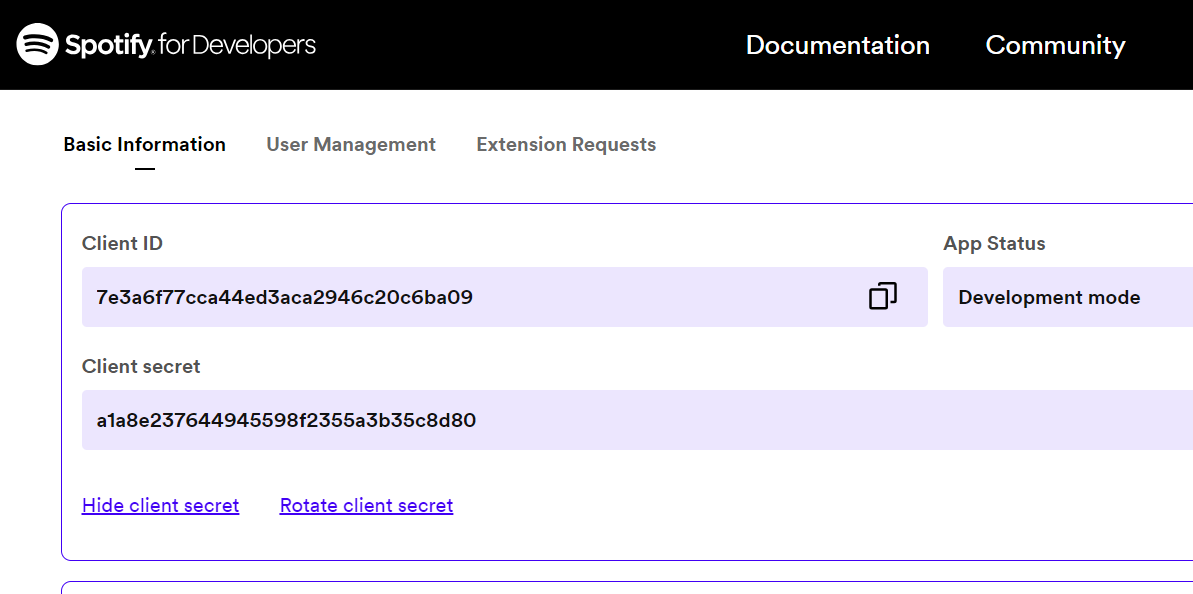

## Scapping the Spotify data using requests and base64

<b> Importing necessary libraries for web scrapping </b>

In [1]:
import requests
import base64

#Replace with own credentials of Client ID and Client Secret
CLIENT_ID = '7e3a6f77cca44ed3aca2946c20c6ba09'
CLIENT_SECRET = 'a1a8e237644945598f2355a3b35c8d80'

#base64 encode the client ID and client secret
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

<font size = '3'> If response code is equal to 200, then website gave permission to scrape the data </font>

In [2]:
# Request the access token
token_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': f'Basic {client_credentials_base64.decode()}'
}
data = {
    'grant_type': 'client_credentials'
}
response = requests.post(token_url, data=data, headers=headers)

if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained successfully.")
else:
    print("Error obtaining access token.")
    exit()

Access token obtained successfully.


<b> Scrapping the data and storing in a dataframe </b>

<font size="3"> In the code above, the variables CLIENT_ID and CLIENT_SECRET contain my credentials (you need to add your credentials to these variables) to uniquely identify the app that is sending the request to the Spotify API. These credentials are obtained when developers register their apps with Spotify's Developer Console. The client ID identifies the application, while the client secret is the secret key used for authentication.
    
<font size="3"> The client ID and secret are combined in the client_credentials variable, separated by a colon (:). This string is then encoded with Base64 encoding to create a secure representation of the authentication information. We then proceed to request an access token to the Spotify API.
    
<font size="3"> It sends a POST request to token_url (https://accounts.spotify.com/api/token) with client authentication information in the Authorization header, which is needed to authenticate the client. The grant_type parameter is set to "client_credentials" to indicate that the application requires an access token for the client credential flow.
Thanks to the access token, the app can now make authorized requests to retrieve music data, such as songs, albums, artists, and user information, which is basic. to create a music recommendation system using Spotify API and Python.
    
Steps: https://alpargur.medium.com/scrape-spotifys-api-in-within-20-mins-611885897851

<font size="3">Now I will write a function that gets music data from any playlist on Spotify. For this task, you need to install the Spotipy library, which is a Python library that provides access to the Spotify Web API. Here's how to install it on your system by writing the command mentioned below in your command prompt or terminal:

 - pip install Spotipy


https://spotifyscraper.readthedocs.io/en/latest/
    
  
<font size="3"> Below I define the function responsible for collecting music data from any Spotify playlist using the Spotipy library:

In [3]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth

def get_trending_playlist_data(playlist_id, access_token):
    # Set up Spotipy with the access token
    sp = spotipy.Spotify(auth=access_token)

    # Get the tracks from the playlist
    playlist_tracks = sp.playlist_tracks(playlist_id, fields='items(track(id, name, artists, album(id, name)))')

    # Extract relevant information and store in a list of dictionaries
    music_data = []
    for track_info in playlist_tracks['items']:
        track = track_info['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']

        # Get audio features for the track
        audio_features = sp.audio_features(track_id)[0] if track_id != 'Not available' else None

        # Get release date of the album
        try:
            album_info = sp.album(album_id) if album_id != 'Not available' else None
            release_date = album_info['release_date'] if album_info else None
        except:
            release_date = None

        # Get popularity of the track
        try:
            track_info = sp.track(track_id) if track_id != 'Not available' else None
            popularity = track_info['popularity'] if track_info else None
        except:
            popularity = None

        # Add additional track information to the track data
        track_data = {
            'Track Name': track_name,
            'Artists': artists,
            'Album Name': album_name,
            'Album ID': album_id,
            'Track ID': track_id,
            'Popularity': popularity,
            'Release Date': release_date,
            'Duration (ms)': audio_features['duration_ms'] if audio_features else None,
            'Explicit': track_info.get('explicit', None),
            'External URLs': track_info.get('external_urls', {}).get('spotify', None),
            'Danceability': audio_features['danceability'] if audio_features else None,
            'Energy': audio_features['energy'] if audio_features else None,
            'Key': audio_features['key'] if audio_features else None,
            'Loudness': audio_features['loudness'] if audio_features else None,
            'Mode': audio_features['mode'] if audio_features else None,
            'Speechiness': audio_features['speechiness'] if audio_features else None,
            'Acousticness': audio_features['acousticness'] if audio_features else None,
            'Instrumentalness': audio_features['instrumentalness'] if audio_features else None,
            'Liveness': audio_features['liveness'] if audio_features else None,
            'Valence': audio_features['valence'] if audio_features else None,
            'Tempo': audio_features['tempo'] if audio_features else None,
            # Add more attributes as needed
        }

        music_data.append(track_data)

    # Create a pandas DataFrame from the list of dictionaries
    df = pd.DataFrame(music_data)

    return df

<font size="3">This function starts by initializing the Spotipy client with the provided access_token, which serves as an authentication token for interacting with the Spotify Web API. access_token allows the function to make authorized requests to access Spotify resources.
    
<font size="3">The function then uses the Spotipy client to retrieve information about the tracks in the specified playlist (identified by that playlist's playlist_id). The sp.playlist_tracks method retrieves tracks from a playlist. Field parameters are used to specify the specific track information required, such as track ID, name, artist, album ID, and album name.
    
<br>

<font size="3"> This function then extracts relevant information from the tracks in the retrieved playlist and stores it in a dictionary list called music_data. For each track in the playlist, the function extracts data such as track name, artist (combined into a string), album name, album ID, track album ID, and popularity. 
    
<font size="3">This function uses the sp.audio_features method to retrieve audio features for each track in the playlist. These audio features include attributes such as danceability, energy, timbre, volume, speech, acoustics, instrumentality, liveliness, valence, tempo, and more. These audio features provide detailed information about the characteristics of each track.
    
<br>

<font size="3">Extracted information for all tracks is stored in the music_data list. This function will then create a DataFrame from the music_data list. DataFrame organizes music data in tabular form, making it easier to analyze and use the information collected.

<font size="3"> Now, here's how to use this feature to crawl music from any playlist on Spotify:

In [4]:
playlist_id = '37i9dQZF1DX44F1QWqYoaV'

# Call the function to get the music data from the playlist and store it in a DataFrame
music_df = get_trending_playlist_data(playlist_id, access_token)

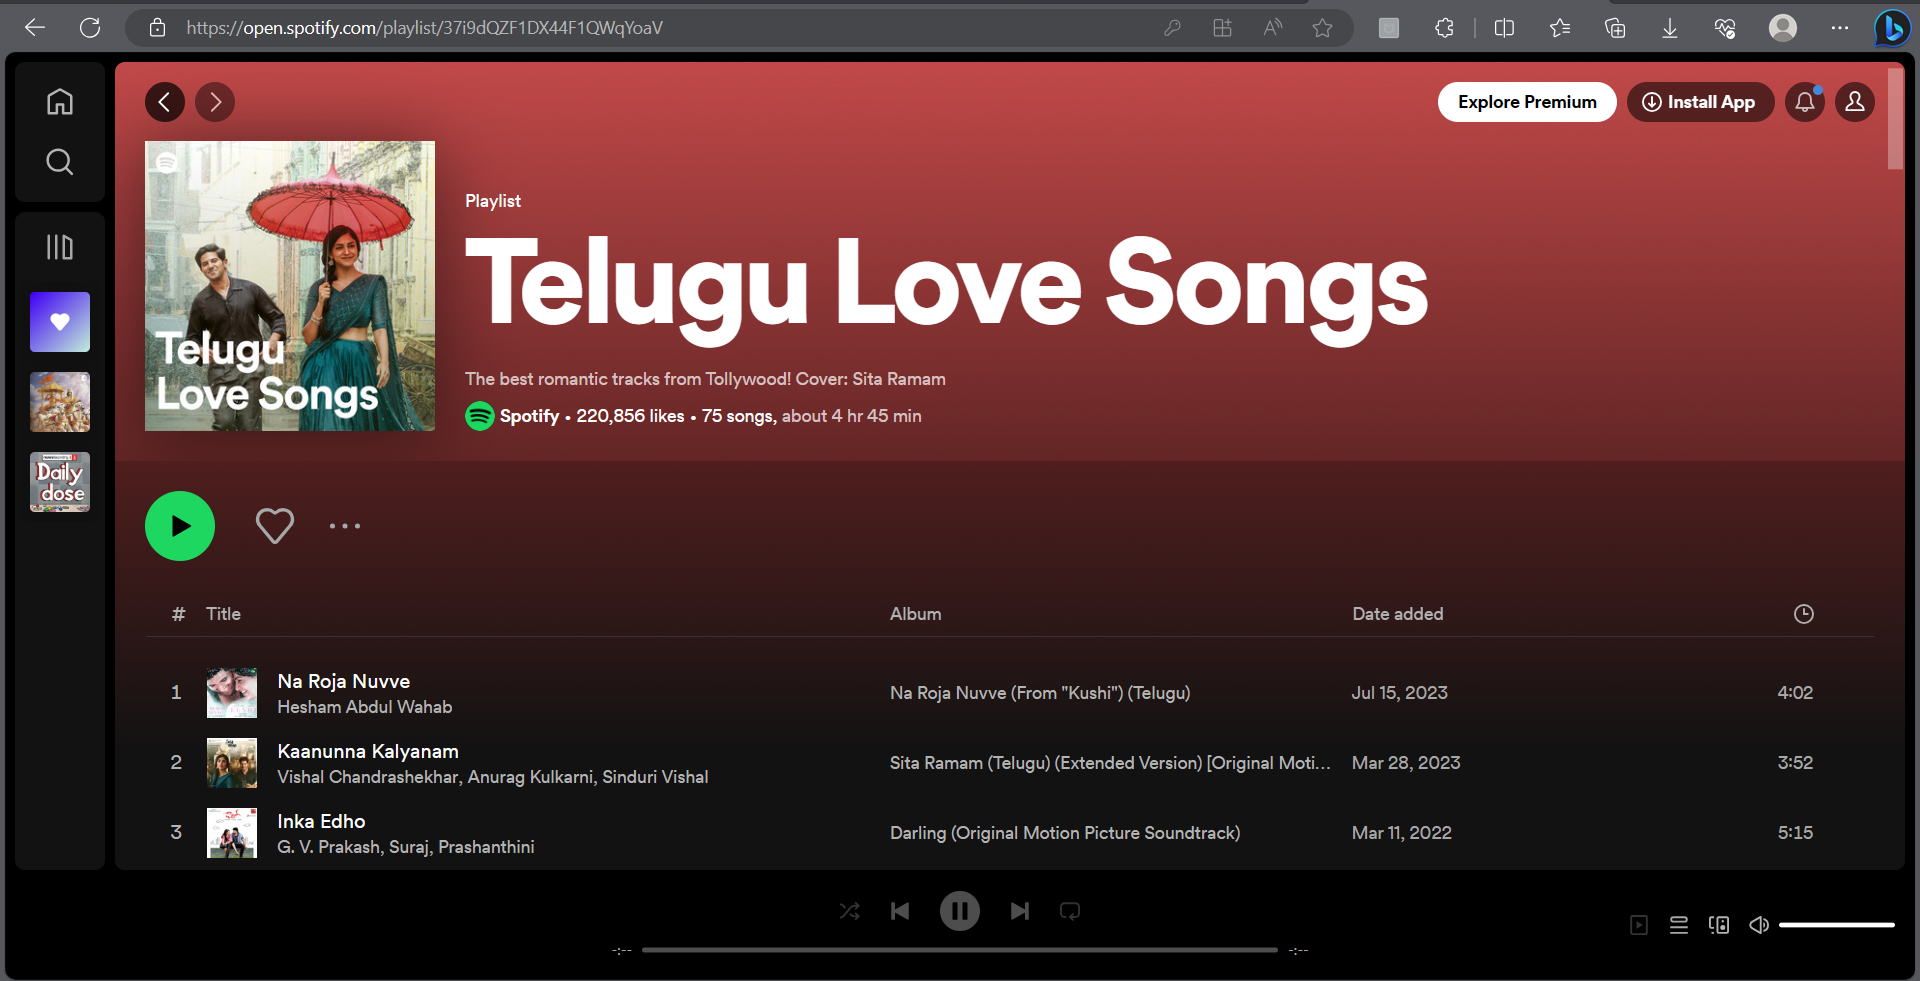

In [5]:
# Display the DataFrame
music_df

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,"Na Roja Nuvve (From ""Kushi"")","Hesham Abdul Wahab, Shiva Nirvana","Na Roja Nuvve (From ""Kushi"") - Single",7a4m6yhn2bdPSxTn0SXJLS,7s2yiftmEe1c5Q1wqIPsqr,54,2023-05-10,242526,False,https://open.spotify.com/track/7s2yiftmEe1c5Q1...,...,0.687,10,-6.546,0,0.0380,0.310,0.000000,0.0679,0.680,95.025
1,Kaanunna Kalyanam,"Vishal Chandrashekhar, Anurag Kulkarni, Sindur...",Sita Ramam (Telugu) (Extended Version) [Origin...,5d0eh1FoU7tOYEnHLohjjv,2rDPTKSWgUbFuV1jFzPqvE,63,2022-09-08,232514,False,https://open.spotify.com/track/2rDPTKSWgUbFuV1...,...,0.426,6,-12.018,0,0.0415,0.670,0.000000,0.3580,0.722,180.125
2,Inka Edho,"G. V. Prakash, Suraj, Prashanthini",Darling (Original Motion Picture Soundtrack),13J2XQOZo0I8ZAufTXFvyd,0WM0NpFIZg6JhgneUyU5tl,64,2010-04-13,315493,False,https://open.spotify.com/track/0WM0NpFIZg6Jhgn...,...,0.784,7,-6.674,1,0.0314,0.333,0.001840,0.1880,0.549,92.016
3,Nijame Ne Chebutunna,"Sid Sriram, Shekar Chandra",Ooru Peru Bhairavakona,6a287rBCL3c5YmfQ9JiQkB,37KgM3qNYvDdMC9m6IvBOf,73,2023-03-31,214998,False,https://open.spotify.com/track/37KgM3qNYvDdMC9...,...,0.508,11,-9.322,0,0.0319,0.654,0.000014,0.2370,0.491,99.013
4,Kalalo Kooda,"Tanishk Bagchi, Sid Sriram, Vaishnavi Kovvuri",Liger (Telugu) [Original Motion Picture Soundt...,0bI7C4I6FzlNlZZDqJOfDJ,5Tn2aBp45QypSmCpmhKtJN,67,2022-08-27,246806,False,https://open.spotify.com/track/5Tn2aBp45QypSmC...,...,0.596,5,-6.580,1,0.0289,0.651,0.000000,0.0692,0.605,108.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,"He’s Soo Cute (From ""Sarileru Neekevvaru"")","Madhu Priya, Devi Sri Prasad","He’s Soo Cute (From ""Sarileru Neekevvaru"")",50udaEReo1qUJUU2bzQoIw,7rlCMRioM2TkdhHdnXCpsr,53,2019-12-16,209649,False,https://open.spotify.com/track/7rlCMRioM2TkdhH...,...,0.801,7,-4.897,0,0.1850,0.412,0.000193,0.0540,0.963,153.990
71,O Vasumathi,"Yazin Nizar, Rita Thyagarajan",Bharat Ane Nenu,1gAJEsWpW8QZZ9ORG6SJEQ,2jmBbje6QjXAHK5fjaDSOq,50,2018-04-07,273824,False,https://open.spotify.com/track/2jmBbje6QjXAHK5...,...,0.791,9,-3.677,0,0.0844,0.165,0.000013,0.0528,0.854,90.026
72,Kanti Papa,"Thaman S, Armaan Malik, Deepu, Geetha Madhuri,...",Vakeel Saab,7gt07BVQlpHL3uJEiG6cCa,4WSam3pcMqExTIVFP9IB3Y,49,2021-03-17,264330,False,https://open.spotify.com/track/4WSam3pcMqExTIV...,...,0.787,9,-7.617,0,0.0322,0.798,0.104000,0.4070,0.786,101.060
73,You & Me,"Hariharan, Shreya Ghoshal",Khaidi No 150,5vVzgxWC3S6eiQ1a5rYvo0,008lRa3qOTxsZE3UeKW8yp,49,2017-01-05,229321,False,https://open.spotify.com/track/008lRa3qOTxsZE3...,...,0.715,9,-4.307,0,0.0836,0.200,0.014500,0.1030,0.736,118.988


<b>Track Name </b>: The name or title of the music track.

<b>Artists </b>: The name of the artist or artists who performed the track. It may contain multiple artists for collaborative songs.

<b>Album Name </b>: The title of the album to which the track belongs.

<b>Album ID </b>: A unique identifier for the album on Spotify.

<b>Track ID </b>: A unique identifier for the individual track on Spotify.

<b>Popularity </b>: A numerical value representing the track's popularity on Spotify. Higher values typically indicate more popular tracks.

<b>Release Date </b>: The date when the track was released to the public.

<b>Duration (ms) </b>: The duration of the track in milliseconds (ms).

<b>Explicit</b>: A binary indicator (e.g., 0 or 1) that denotes whether the track contains explicit content or lyrics.

<b>External URLs </b>: URLs that link to the track on the Spotify platform or other external sources.

<b>Danceability </b>: A numerical measure of how suitable the track is for dancing, with higher values indicating tracks that are more danceable.

<b>Energy </b>: A numerical measure of the energy level of the track, with higher values indicating more energetic tracks.

<b>Key</b>: The musical key of the track, which can help identify the tonal center or pitch of the song.

<b>Loudness</b>: A measure of the overall loudness of the track in decibels (dB).

<b>Mode</b>: Indicates whether the track is in a major (1) or minor (0) key, providing information about the track's mood.

<b>Speechiness</b>: A measure of the presence of spoken words or speech in the track, which can indicate how "talky" or lyrical the song is.

<b>Acousticness</b>: A numerical measure of the track's acoustic characteristics, with higher values indicating a more acoustic or less electronic sound.

<b>Instrumentalness</b>: A numerical measure indicating the likelihood that the track is purely instrumental, with higher values suggesting a higher degree of instrumental content.

<b>Liveness</b>: A measure of the presence of live audience or performance elements in the track, with higher values indicating a live recording or performance.

<b>Valence</b>: A measure of the track's emotional valence or positivity, with higher values indicating more positive or happy-sounding tracks.

<b>Tempo</b>: The tempo of the track, typically measured in beats per minute (BPM), indicating how fast or slow the track is.


In [6]:
music_df.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,"Na Roja Nuvve (From ""Kushi"")","Hesham Abdul Wahab, Shiva Nirvana","Na Roja Nuvve (From ""Kushi"") - Single",7a4m6yhn2bdPSxTn0SXJLS,7s2yiftmEe1c5Q1wqIPsqr,54,2023-05-10,242526,False,https://open.spotify.com/track/7s2yiftmEe1c5Q1...,...,0.687,10,-6.546,0,0.0380,0.310,0.000000,0.0679,0.680,95.025
1,Kaanunna Kalyanam,"Vishal Chandrashekhar, Anurag Kulkarni, Sindur...",Sita Ramam (Telugu) (Extended Version) [Origin...,5d0eh1FoU7tOYEnHLohjjv,2rDPTKSWgUbFuV1jFzPqvE,63,2022-09-08,232514,False,https://open.spotify.com/track/2rDPTKSWgUbFuV1...,...,0.426,6,-12.018,0,0.0415,0.670,0.000000,0.3580,0.722,180.125
2,Inka Edho,"G. V. Prakash, Suraj, Prashanthini",Darling (Original Motion Picture Soundtrack),13J2XQOZo0I8ZAufTXFvyd,0WM0NpFIZg6JhgneUyU5tl,64,2010-04-13,315493,False,https://open.spotify.com/track/0WM0NpFIZg6Jhgn...,...,0.784,7,-6.674,1,0.0314,0.333,0.001840,0.1880,0.549,92.016
3,Nijame Ne Chebutunna,"Sid Sriram, Shekar Chandra",Ooru Peru Bhairavakona,6a287rBCL3c5YmfQ9JiQkB,37KgM3qNYvDdMC9m6IvBOf,73,2023-03-31,214998,False,https://open.spotify.com/track/37KgM3qNYvDdMC9...,...,0.508,11,-9.322,0,0.0319,0.654,0.000014,0.2370,0.491,99.013
4,Kalalo Kooda,"Tanishk Bagchi, Sid Sriram, Vaishnavi Kovvuri",Liger (Telugu) [Original Motion Picture Soundt...,0bI7C4I6FzlNlZZDqJOfDJ,5Tn2aBp45QypSmCpmhKtJN,67,2022-08-27,246806,False,https://open.spotify.com/track/5Tn2aBp45QypSmC...,...,0.596,5,-6.580,1,0.0289,0.651,0.000000,0.0692,0.605,108.011


#### Information of the dataset

In [7]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        75 non-null     object 
 1   Artists           75 non-null     object 
 2   Album Name        75 non-null     object 
 3   Album ID          75 non-null     object 
 4   Track ID          75 non-null     object 
 5   Popularity        75 non-null     int64  
 6   Release Date      75 non-null     object 
 7   Duration (ms)     75 non-null     int64  
 8   Explicit          75 non-null     bool   
 9   External URLs     75 non-null     object 
 10  Danceability      75 non-null     float64
 11  Energy            75 non-null     float64
 12  Key               75 non-null     int64  
 13  Loudness          75 non-null     float64
 14  Mode              75 non-null     int64  
 15  Speechiness       75 non-null     float64
 16  Acousticness      75 non-null     float64
 17 

#### Checking for null values

In [8]:
music_df.isnull().sum()

Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

## Building Recommendation system using Scapped data

#### Importing the necessary libraries

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

data = music_df

<font size='3'>While providing music recommendations to users, it is important to recommend the latest releases. For this, we need to give more weight to the latest releases in the recommendations. Let’s write a function to solve this problem:

In [10]:
#Function to calculate the weighted popularity scores based on release dates
def calculate_weighted_popularity(release_date):
    
    # Convert the release date to datetime object
    release_date = datetime.strptime(release_date, '%Y-%m-%d')

    # Calculate the time span between release date and today's date
    time_span = datetime.now() - release_date

    # Calculate the weighted popularity score based on time span (more recent releases have higher weight)
    weight = 1 / (time_span.days + 1)
    
    return weight

<font size="3">The above function takes the release date of the track as input, provided in the format “YYYY-MM-DD”. It then uses the datetime.strptime function from Python's datetime module to convert the release date string to a datetime object. This conversion allows us to perform arithmetic operations with dates. 

<font size="3">The function will then calculate the time between the song's release date and the current date (today's date) using datetime.now() – Release_date. This results in a timedelta object representing the time difference between two dates. The weighted popularity score is calculated based on the time period. The formula for calculating weight is 1/(time_span.days + 1). The time_span.days property of the timedelta object indicates the number of days between the release date and today. Adding 1 to the number of days ensures that the weight is never 0, even for the most recent versions, as this would cause a division-by-zero error.

<br>   
  
<font size="3">The idea behind this formula is that the weight decreases as the time interval from the release date to today increases. Newer versions will have a higher weight, while older versions will have a lower weight. Therefore, by combining this weighted popularity score with other factors in the recommendation system, recent tracks will have a more significant impact on the final recommendations, reflecting potential interest. user hidden for newer music.
    
<br>

<font size="3">Now let's standardize the music features before continuing:

In [11]:
#Normalize the music features using Min-Max Scaking
scaler = MinMaxScaler()

music_features = music_df[['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 
                           'Acousticness','Instrumentalness', 'Liveness', 'Valence', 'Tempo']]

music_features_scaled = scaler.fit_transform(music_features)

<font size='3'>We will create a hybrid recommendation system for music recommendations. The first approach will be based on recommending music based on music audio features, and the second approach will be based on recommending music based on weighted popularity.

Here’s how to generate music recommendations based on the music audio features:

In [12]:
#A function to get content-based recommendation based on music features

def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in music_df['Track Name'].values:
        print(f"'{input_song_name}' not found in the list. Please enter a valid song name")
        return
    
    #Get the index of the input song in the music dataframe
    input_song_index = music_df[music_df['Track Name'] == input_song_name].index[0]
    
    #Calculate the similarity score based on music features(cosine similarity)
    similarity_scores = cosine_similarity([music_features_scaled[input_song_index]], music_features_scaled)
    
    #Get the indices of the most smilar songs
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]
    
    #Get the names of the most similar songs based on content-based filtering
    content_based_recommendations = music_df.iloc[similar_song_indices][['Track Name','Artists', 'Album Name', 'Release Date','Popularity']]
    
    return content_based_recommendations

<font size='3'>The above function takes input_song_name as the input, which represents the name of the song for which recommendations are to be generated. The function checks if the input_song_name exists in the music_df DataFrame, which presumably contains the music data with features like ‘Track Name’, ‘Artists’, ‘Album Name’, ‘Release Date’, and ‘Popularity’. If the input song name is found in the music_df DataFrame, the function retrieves the index of the input song in the DataFrame. This index will be used to compare the audio features of the input song with other songs in the dataset.

<font size='3'> The function calculates the similarity scores between the audio features of the input song and all other songs in the dataset. It uses cosine similarity, a common measure used in content-based filtering. The cosine_similarity function from scikit-learn is employed to compute these similarity scores.

<font size='3'> The function identifies the num_recommendations most similar songs to the input song based on their audio features. It does this by sorting the similarity scores in descending order and selecting the top num_recommendations songs. The input song itself is excluded from the recommendations (hence the [1:num_recommendations + 1] slicing). The function then extracts the details (such as track name, artists, album name, release date, and popularity) of the most similar songs from the music_df DataFrame using the indices of the most similar songs.

<font size='3'> Now here’s the function to generate music recommendations based on weighted popularity and combine it with the recommendations of the content-based filtering method using the hybrid approach:

In [13]:
input_song_name = "Undipova"
recommendations = content_based_recommendations(input_song_name, num_recommendations=5)
print(f"content based recommended songs for '{input_song_name}':")
print(recommendations)

content based recommended songs for 'Undipova':
                               Track Name  \
8                           Gaali Vaaluga   
64  Baby Won't You Tell Me (From "Saaho")   
74                           Antha Ishtam   
14          Kannuladha - The Kiss of Love   
33                      Baitikochi Chuste   

                                              Artists  \
8                                 Anirudh Ravichander   
64  Shweta Mohan, Siddharth Mahadevan, Shankar Mah...   
74                                      K. S. Chithra   
14        Anirudh Ravichander, Dhanush, Shruti Haasan   
33                                Anirudh Ravichander   

                                Album Name Release Date  Popularity  
8                           Agnyaathavaasi   2017-11-07          65  
64   Baby Won't You Tell Me (From "Saaho")   2019-08-26          55  
74                           Bheemla Nayak   2021-10-15          49  
14  3 (Original Motion Picture Soundtrack)   2012-03-22   

In [14]:
#A function to get hubrid recommendations based on weighted popularity

def hybrid_recommendations(input_song_name, num_recommendations=5, alpha=0.5):
    if input_song_name not in music_df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get content-based recommendations
    content_based_rec = content_based_recommendations(input_song_name, num_recommendations)

    # Get the popularity score of the input song
    popularity_score = music_df.loc[music_df['Track Name'] == input_song_name, 'Popularity'].values[0]

    # Calculate the weighted popularity score
    weighted_popularity_score = popularity_score * calculate_weighted_popularity(music_df.loc[music_df['Track Name'] == input_song_name, 'Release Date'].values[0])

    # Combine content-based and popularity-based recommendations based on weighted popularity
    hybrid_recommendations = content_based_rec
    hybrid_recommendations = hybrid_recommendations.append({
        'Track Name': input_song_name,
        'Artists': music_df.loc[music_df['Track Name'] == input_song_name, 'Artists'].values[0],
        'Album Name': music_df.loc[music_df['Track Name'] == input_song_name, 'Album Name'].values[0],
        'Release Date': music_df.loc[music_df['Track Name'] == input_song_name, 'Release Date'].values[0],
        'Popularity': weighted_popularity_score
    }, ignore_index=True)

    # Sort the hybrid recommendations based on weighted popularity score
    hybrid_recommendations = hybrid_recommendations.sort_values(by='Popularity', ascending=False)

    # Remove the input song from the recommendations
    hybrid_recommendations = hybrid_recommendations[hybrid_recommendations['Track Name'] != input_song_name]

    return hybrid_recommendations

<font size="3">The hybrid approach aims to provide more relevant and personalized recommendations by taking into account both the similarity of song content and their weighted popularity. The function takes input_song_name as input, representing the name of the song for which the recommendation will be generated. This function first calls the content_based_recommendations function to get content-based recommendations for the input song. The num_recommendations parameter determines the number of content-based recommendations to retrieve.
    
<br>
    
<font size="3">The function calculates the popularity score of the input song by retrieving the popularity value from the music_df data frame. It also calculates a weighted popularity score using the Calculate_weighted_popularity function (defined earlier) based on the input song's release date. The alpha setting controls the relative importance of recommendations based on content and popularity.
    
<br>    
    
<font size="3">Recommendations based on previously obtained content are stored in the content_based_rec DataFrame. This feature combines content-based recommendations with entered song information (song name, artist, album name, release date, and popularity) as well as its weighted popularity score. This step creates a DataFrame named hybrid_recommendations that includes both content-based recommendations and input song data. The hybrid_recommendations DataFrame is then sorted in descending order based on the weighted popularity score. This step ensures that the most popular and relevant songs appear at the top of recommendations. The imported song is then removed from the recommendations to avoid suggesting similar songs as part of the recommendations.
    
<br>    
    
<font size="3">Now here's how we can test the final function for generating music recommendations:

In [15]:
input_song_name = "Undipova"
recommendations = hybrid_recommendations(input_song_name, num_recommendations=5)
print(f"Hybrid recommended songs for '{input_song_name}':")
print(recommendations)

Hybrid recommended songs for 'Undipova':
                              Track Name  \
0                          Gaali Vaaluga   
3          Kannuladha - The Kiss of Love   
4                      Baitikochi Chuste   
1  Baby Won't You Tell Me (From "Saaho")   
2                           Antha Ishtam   

                                             Artists  \
0                                Anirudh Ravichander   
3        Anirudh Ravichander, Dhanush, Shruti Haasan   
4                                Anirudh Ravichander   
1  Shweta Mohan, Siddharth Mahadevan, Shankar Mah...   
2                                      K. S. Chithra   

                               Album Name Release Date  Popularity  
0                          Agnyaathavaasi   2017-11-07        65.0  
3  3 (Original Motion Picture Soundtrack)   2012-03-22        63.0  
4                          Agnyaathavaasi   2017-11-07        61.0  
1   Baby Won't You Tell Me (From "Saaho")   2019-08-26        55.0  
2           

### Summary

 <font size="3"> A music recommendation system is a data science application that helps users discover new and relevant music content based on their preferences and listening behavior.